In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data= pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
test_data= pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")




In [3]:
# take a look at the dataset
train_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
#train data
print("There are " + str(len(train_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(train_data.columns)) + " variables in the dataset.")

There are 1296675 observations in the credit card fraud dataset.
There are 23 variables in the dataset.


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
print(train_data['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [8]:
labels=["Genuine","Fraud"]

fraud_or_not = train_data["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=train_data['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

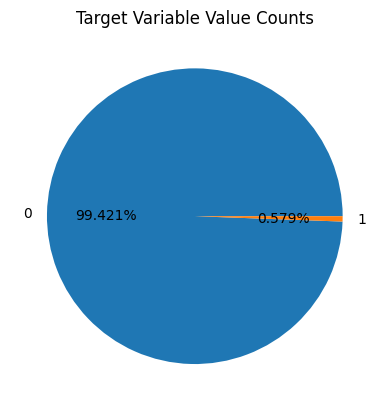

In [9]:
# get the set of distinct classes
labels = train_data.is_fraud.unique()

# get the count of each class
sizes = train_data.is_fraud.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

In [10]:
print('Genuine:', round(train_data['is_fraud'].value_counts()[0]/len(train_data) * 100,2), '% of the dataset')
print('Frauds:', round(train_data['is_fraud'].value_counts()[1]/len(train_data) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


In [11]:
# for train
import pandas as pd


df = pd.DataFrame(train_data)

# Drop multiple features
features_to_drop = ["trans_date_trans_time",'merchant', 'category', 'first', 'last', 'gender',"street","city","state","job","dob","trans_num"]
X_tr = df.drop(features_to_drop, axis=1)
y = df['is_fraud']

print(X_tr)

         Unnamed: 0               cc_num     amt    zip      lat      long  \
0                 0     2703186189652095    4.97  28654  36.0788  -81.1781   
1                 1         630423337322  107.23  99160  48.8878 -118.2105   
2                 2       38859492057661  220.11  83252  42.1808 -112.2620   
3                 3     3534093764340240   45.00  59632  46.2306 -112.1138   
4                 4      375534208663984   41.96  24433  38.4207  -79.4629   
...             ...                  ...     ...    ...      ...       ...   
1296670     1296670       30263540414123   15.56  84735  37.7175 -112.4777   
1296671     1296671     6011149206456997   51.70  21790  39.2667  -77.5101   
1296672     1296672     3514865930894695  105.93  88325  32.9396 -105.8189   
1296673     1296673     2720012583106919   74.90  57756  43.3526 -102.5411   
1296674     1296674  4292902571056973207    4.30  59871  45.8433 -113.8748   

         city_pop   unix_time  merch_lat  merch_long  is_fraud 

In [12]:
# for test
import pandas as pd


df_ts = pd.DataFrame(test_data)

# Drop multiple features
features_to_drop = ["trans_date_trans_time",'merchant', 'category', 'first', 'last', 'gender',"street","city","state","job","dob","trans_num"]
X_ts= df_ts.drop(features_to_drop, axis=1)
y_ts = df_ts['is_fraud']

print(X_ts)

        Unnamed: 0            cc_num     amt    zip      lat      long  \
0                0  2291163933867244    2.86  29209  33.9659  -80.9355   
1                1  3573030041201292   29.84  84002  40.3207 -110.4360   
2                2  3598215285024754   41.28  11710  40.6729  -73.5365   
3                3  3591919803438423   60.05  32780  28.5697  -80.8191   
4                4  3526826139003047    3.19  49632  44.2529  -85.0170   
...            ...               ...     ...    ...      ...       ...   
555714      555714    30560609640617   43.77  63453  40.4931  -91.8912   
555715      555715  3556613125071656  111.84  77566  29.0393  -95.4401   
555716      555716  6011724471098086   86.88  99323  46.1966 -118.9017   
555717      555717     4079773899158    7.99  83643  44.6255 -116.4493   
555718      555718  4170689372027579   38.13  73034  35.6665  -97.4798   

        city_pop   unix_time  merch_lat  merch_long  is_fraud  
0         333497  1371816865  33.986391  -81.20

In [13]:
print(y_ts)

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64


In [15]:
# data preprocessing such as scaling/normalization is typically useful for 
# linear models to accelerate the training convergence

# standardize features by removing the mean and scaling to unit variance
X_tr.iloc[:, 0:10] = StandardScaler().fit_transform(X_tr.iloc[:, 0:10])
data_matrix = X_tr.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 0:10]


# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (1296675, 10) y.shape= (1296675,)


In [17]:
# data preprocessing such as scaling/normalization is typically useful for 
# linear models to accelerate the training convergence

# standardize features by removing the mean and scaling to unit variance
X_ts.iloc[:, 0:10] = StandardScaler().fit_transform(X_ts.iloc[:, 0:10])
data_matrix_ts = X_ts.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X_ts = data_matrix_ts[:, 0:10]

# data normalization
X_ts = normalize(X_ts, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X_ts.shape, 'y.shape=', y_ts.shape)

X.shape= (555719, 10) y.shape= (555719,)


# Build a Decision Tree Classifier model with Scikit-Learn

In [19]:
# compute the sample weights to be used as input to the train routine so that 
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
t0 = time.time()
sklearn_dt.fit(X, y, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  13.06437


# Evaluate Decision Tree Classifier Models

In [26]:
y_pred=sklearn_dt.predict(X_ts)

In [24]:
# Evaluate the model on the testing data
accuracy = sklearn_dt.score(X_ts, y_ts)
print("Accuracy:", accuracy)  

Accuracy: 0.9633393855527703


In [25]:
from sklearn.metrics import *
def evaluate(test, pred):
    accuracy = accuracy_score(test, pred)
    cf_report = classification_report(test, pred)
    precision = precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')
    
    print('Accuracy', accuracy)
    print('Classification Report', cf_report)
    print('Precision', precision)
    print('Recall', recall)
    print('F1-Score', f1)

In [27]:
evaluate(y_ts,y_pred)

Accuracy 0.9633393855527703
Classification Report               precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.07      0.75      0.14      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.86      0.56    555719
weighted avg       1.00      0.96      0.98    555719

Precision 0.5368658662993911
Recall 0.8555156888835855
F1-Score 0.5585837878229252


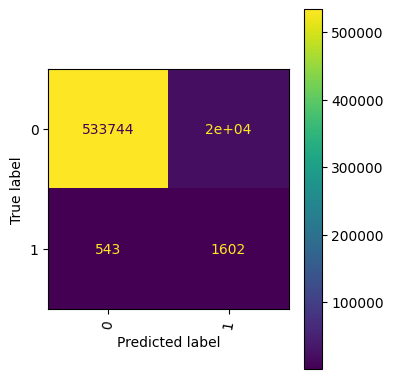

In [41]:
fig, ax = plt.subplots(figsize=(4, 4))
    # Create the confusion matrix
cm = confusion_matrix(y_ts, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=sklearn_dt.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [51]:
#Extra Tree - Confusion matrix
print("Confusion Matrix(Select Data By Extra Tree)")
pred_test = sklearn_dt.predict(X_ts)
pd.DataFrame(confusion_matrix(y_ts,pred_test), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix(Select Data By Extra Tree)


,Predicted Positive,Predicted Nagative
Actual Positive,533744,19830
Actual Negative,543,1602


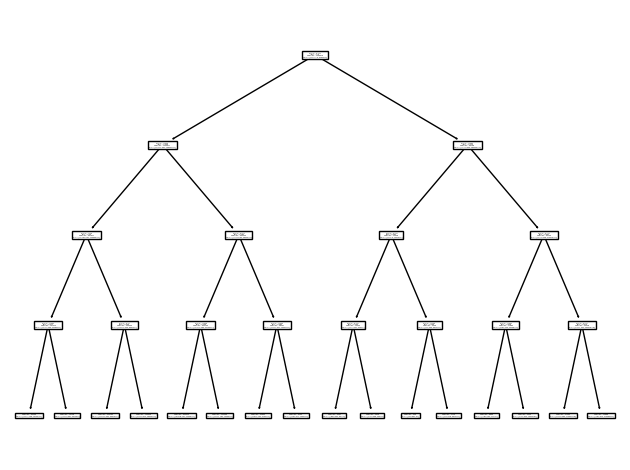

In [49]:
tree.plot_tree(sklearn_dt)
plt.tight_layout()
plt.show()

In [30]:
# run inference and compute the probabilities of the test samples 
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_ts)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_ts, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))


[Scikit-Learn] ROC-AUC score : 0.904


# linear Support Vector Machine (SVM) model from Scikit-Learn

In [42]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X, y)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  20.45


In [43]:
y_pred2=sklearn_svm.predict(X_ts)

In [44]:
# Evaluate the model on the testing data
accuracy = sklearn_svm.score(X_ts, y_ts)
print("Accuracy:", accuracy)  

Accuracy: 0.6820731340839525


In [45]:
evaluate(y_ts,y_pred2)

Accuracy 0.6820731340839525
Classification Report               precision    recall  f1-score   support

           0       1.00      0.68      0.81    553574
           1       0.01      0.81      0.02      2145

    accuracy                           0.68    555719
   macro avg       0.50      0.75      0.41    555719
weighted avg       1.00      0.68      0.81    555719

Precision 0.5043470773959594
Recall 0.7461486255750438
F1-Score 0.4147953337873415


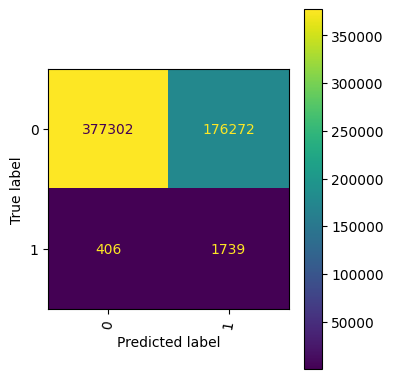

In [46]:
fig, ax = plt.subplots(figsize=(4, 4))
    # Create the confusion matrix
cm = confusion_matrix(y_ts, y_pred2)
cmp = ConfusionMatrixDisplay(cm, display_labels=sklearn_svm.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [47]:
# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_ts)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_ts, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

[Scikit-Learn] ROC-AUC score:   0.835
